In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [100]:
df.shape , df_test.shape

((1600, 6), (400, 5))

In [101]:
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [102]:
df_test.head()

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925


In [103]:
import seaborn as sns

In [104]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.004114,-0.027604,-0.044459,-0.042408,0.012005,0.318835
std,0.997338,1.021776,1.011768,1.017189,0.978654,110.741562
min,-3.380125,-3.314844,-3.153118,-3.250169,-2.851707,-379.829794
25%,-0.647165,-0.705030,-0.706385,-0.709504,-0.615880,-71.897040
50%,-0.000360,-0.043769,-0.041272,-0.029756,-0.013527,-0.610665
75%,0.682118,0.645442,0.639130,0.646290,0.650089,71.226603
max,3.287205,3.438895,3.216176,2.985410,3.321770,337.643014


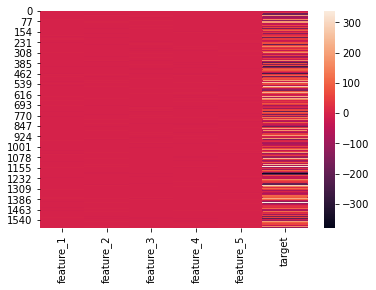

In [105]:
sns.heatmap(df)

In [106]:
df.loc[:,'target'] = df.loc[:,'target'] - df.target.min()


In [107]:
df.target

0       297.675127
1       330.931834
2       457.100165
3       376.841213
4       342.233072
           ...    
1595    299.719782
1596    498.145394
1597    272.319286
1598    332.488236
1599    263.890791
Name: target, Length: 1600, dtype: float64

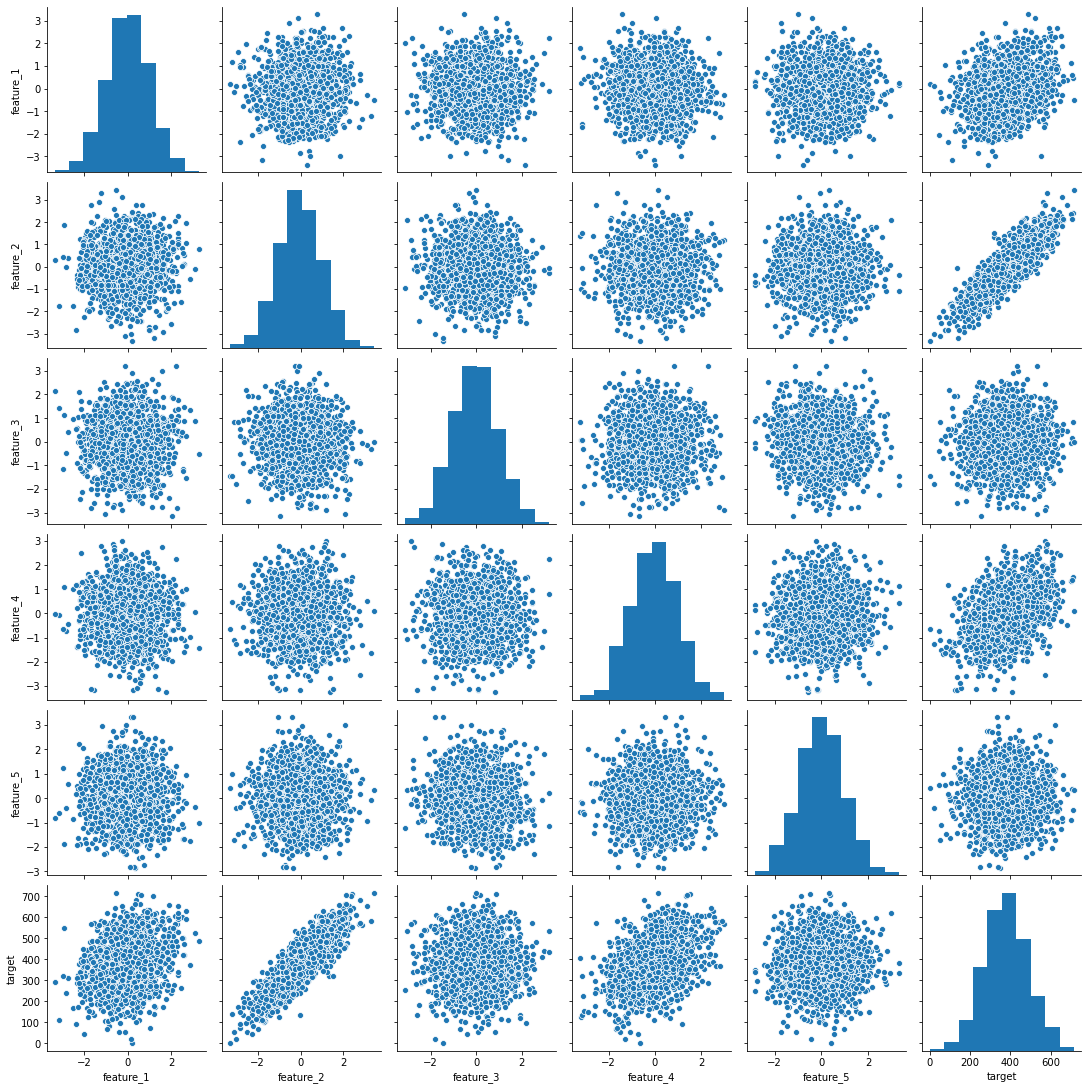

In [108]:
sns.pairplot(df)

In [109]:
df.corr()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_1,1.000000,0.017356,-0.007307,-0.051649,-0.004005,0.260274
feature_2,0.017356,1.000000,-0.053230,-0.000601,0.001096,0.855356
feature_3,-0.007307,-0.053230,1.000000,-0.004463,-0.066958,0.024866
feature_4,-0.051649,-0.000601,-0.004463,1.000000,-0.005602,0.396420
feature_5,-0.004005,0.001096,-0.066958,-0.005602,1.000000,0.014760
target,0.260274,0.855356,0.024866,0.396420,0.014760,1.000000


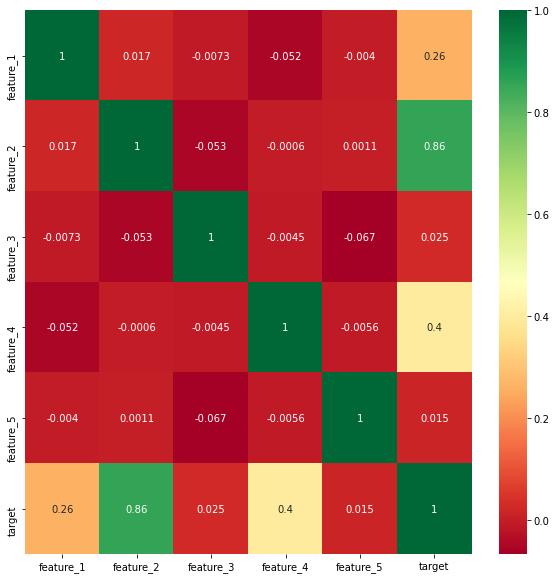

In [110]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [123]:
x = df.iloc[:,:5]
y = df.iloc[:,5]

In [124]:
from sklearn.ensemble import ExtraTreesRegressor

In [125]:
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [126]:
model.feature_importances_

array([0.07230179, 0.73791971, 0.01416812, 0.16537509, 0.01023529])

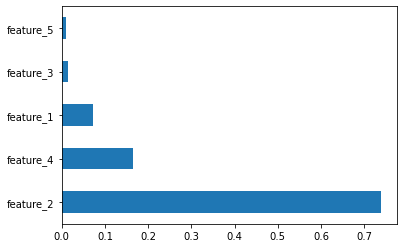

In [127]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()


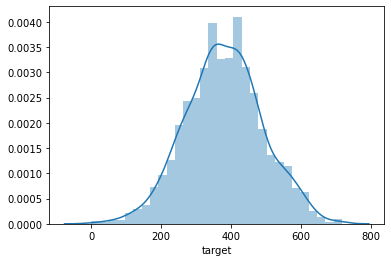

In [128]:
sns.distplot(y)

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [131]:
lr.coef_

array([29.68187118, 92.66247759,  8.28062089, 44.76773522,  2.51916121])

In [132]:
lr.intercept_

384.8207606826845

In [133]:
lr.score(x,y)

0.9660939669975617

In [134]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lr,x,y,cv=5)

In [135]:
score.mean()

0.9655573148783573

In [136]:
pred = lr.predict(df_test)

In [137]:
test = df_test.assign(target = pred)

In [145]:
import joblib
joblib.dump(lr,"air_quality_linear_reg.pkl")

['air_quality_linear_reg.pkl']